<a href="https://colab.research.google.com/github/djdunc/casa0018/blob/main/Week7/CASA0018_7_1_ARIMA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ARIMA

One of the most common methods used in time series forecasting is known as the ARIMA model, which stands for AutoregRessive Integrated Moving Average.
ARIMA, is a forecasting method for univariate time series data that can be fitted to time series data in order to better understand or predict future points in the series.

ARIMA as it stands has limited support for seasonal data.

In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot

from matplotlib.pyplot import figure


--------------------------------------------------------------------------------
# Air Passenger Data

The Box and Jenkins Airline Passengers dataset describes the total number of US international airline passengers over a period of time. The units are a count of the number of monthly international airline passengers in thousands. There are 144 monthly observations from 1949 to 1960.

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) Time Series Analysis, Forecasting and Control. Third Edition. Holden-Day. Series G.

Available from:
https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv

# Load Data Set

Saving airline-passengers.csv to airline-passengers.csv


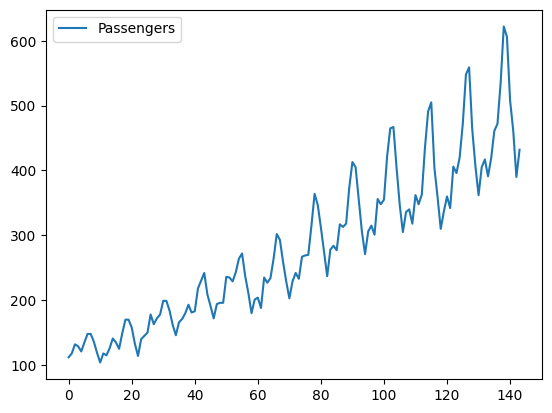

       Month  Passengers
0    1949-01         112
1    1949-02         118
2    1949-03         132
3    1949-04         129
4    1949-05         121
..       ...         ...
139  1960-08         606
140  1960-09         508
141  1960-10         461
142  1960-11         390
143  1960-12         432

[144 rows x 2 columns]


In [2]:
from google.colab import files
from pandas import read_csv

uploaded = files.upload()

airpass = read_csv('airline-passengers.csv')
airpass.plot()
plt.show()
print(airpass)

# Create DataFrame

            Passengers
1949-01-01         112
1949-02-01         118
1949-03-01         132
1949-04-01         129
1949-05-01         121
...                ...
1960-08-01         606
1960-09-01         508
1960-10-01         461
1960-11-01         390
1960-12-01         432

[144 rows x 1 columns]


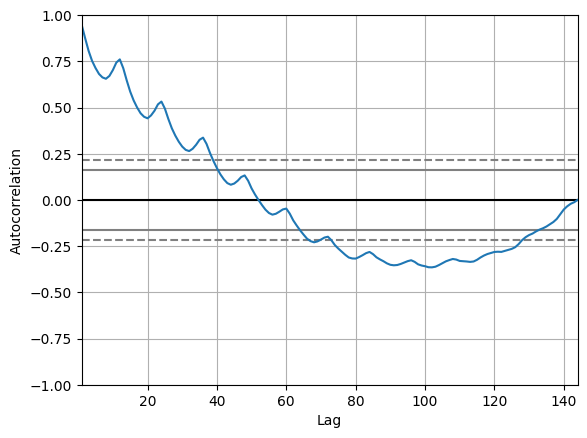

In [3]:

date_rng = pd.date_range('1949-01', periods=144, freq='MS')

# Define a dataframe using x and y values.
df = pd.DataFrame(data=airpass['Passengers'].tolist(), index=date_rng, columns=['Passengers'] )

print(df)

autocorrelation_plot(df)
plt.show()


# Create ARIMA Model

Generally start with low values of p,d,q and use trial and error.

However, we know the data has a trend so use d = 1 here.
The data is also seasonal so a p  term > 1 will help, but more on this later.
We can leave q = 0.

In [8]:
arima_model = ARIMA(df, order=(4, 1, 0))
arima_model_fit = arima_model.fit()
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  144
Model:                 ARIMA(4, 1, 0)   Log Likelihood                -689.108
Date:                Mon, 26 Feb 2024   AIC                           1388.216
Time:                        20:05:51   BIC                           1403.030
Sample:                    01-01-1949   HQIC                          1394.236
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3162      0.088      3.603      0.000       0.144       0.488
ar.L2         -0.2177      0.077     -2.832      0.005      -0.368      -0.067
ar.L3         -0.0708      0.070     -1.017      0.3

# ARIMA Forecast Air Passengers

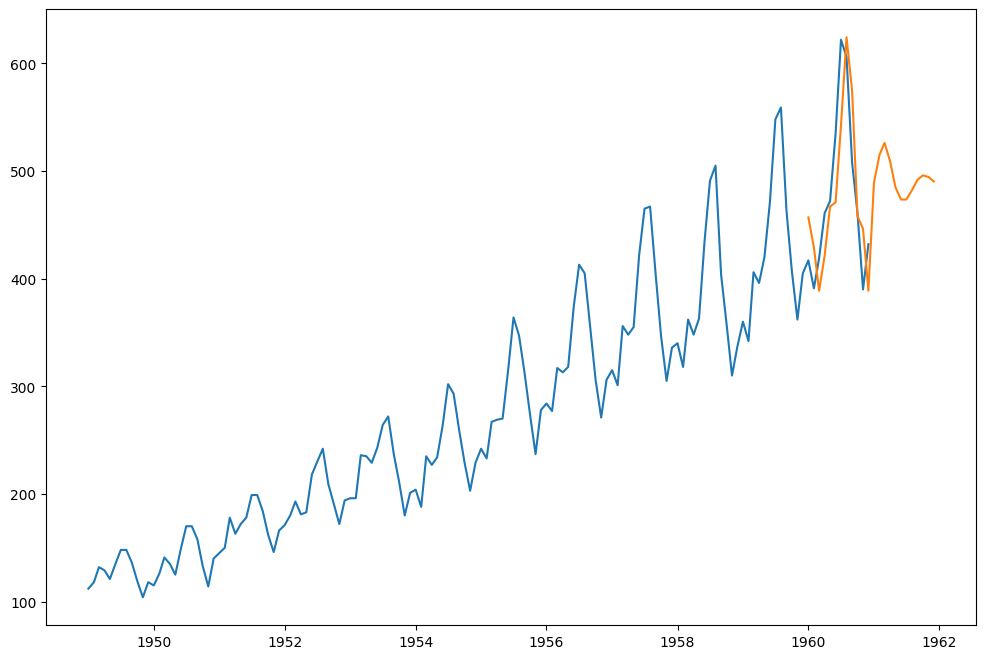

In [5]:
forecast_length=24
forecast_rng = pd.date_range('1960-01-01', periods=forecast_length, freq='MS')

forecast = arima_model_fit.predict(start=forecast_rng[0], end = forecast_rng[-1])

plt.figure(figsize=(12,8))
plt.plot(df.index, df['Passengers'])
plt.plot(forecast_rng, forecast)
plt.show()

# Create SARIMA Model

Seasonal ARIMA (SARIMA) extends ARIMA to cope with seasonal data. It takes additional parameters (P,D,Q,M)

  SARIMA(p, d, q)(P, D, Q, M)

where P,D,Q are seasonal variants of (p,d,q) and M is the number of time steps for a single seasonal period - 12 for this data set.

In [6]:
sarima_model = SARIMAX(df, order=(1, 1, 0), seasonal_order=(1,1,0,12) )
sarima_model_fit = sarima_model.fit()
print(sarima_model_fit.summary())

                                     SARIMAX Results                                      
Dep. Variable:                         Passengers   No. Observations:                  144
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -507.196
Date:                            Mon, 26 Feb 2024   AIC                           1020.393
Time:                                    19:55:46   BIC                           1029.019
Sample:                                01-01-1949   HQIC                          1023.898
                                     - 12-01-1960                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2965      0.082     -3.601      0.000      -0.458      -0.135
ar.S.L12      -0.1397      0.091   

# SARIMA Forecast Air Passengers

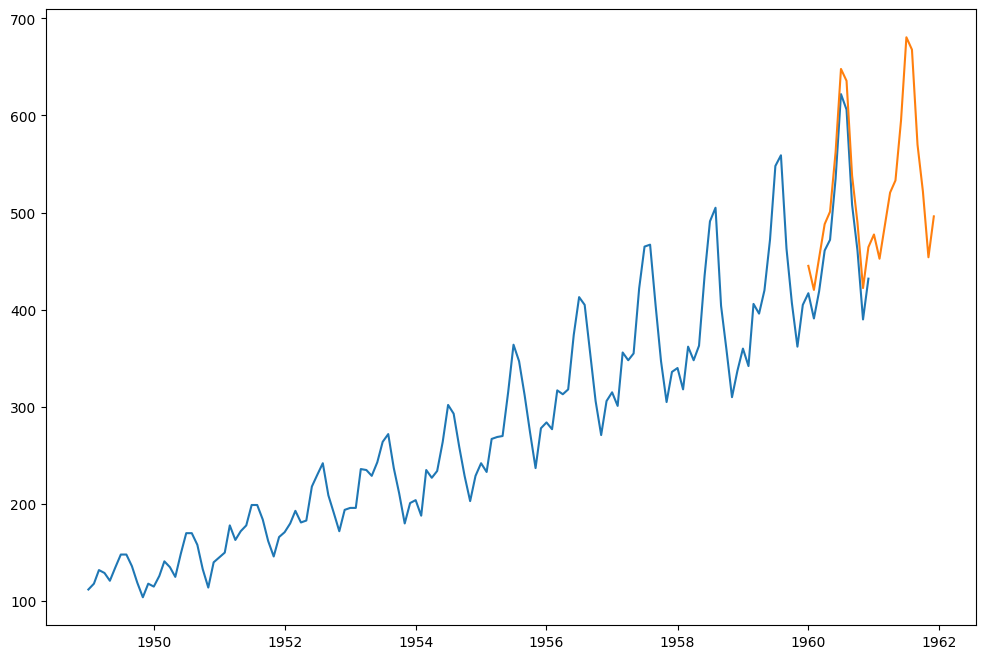

In [7]:
forecast = sarima_model_fit.forecast(steps=forecast_length)

plt.figure(figsize=(12,8))
plt.plot(df.index, df['Passengers'])
plt.plot(forecast_rng, forecast)
plt.show()
